In [7]:
from astropy.io import fits
fits_image_filename = 'LRD_Mar.fits'

# Open the FITS file
hdul = fits.open(fits_image_filename)

In [2]:
hdul.info()

Filename: LRD_Mar.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (9137,)   uint8   
  1  Joined        1 BinTableHDU     37   3341R x 11C   [K, D, D, D, D, D, D, D, D, D, D]   


In [3]:
hdul.close()

In [6]:
print(hdul)

NameError: name 'hdul' is not defined

In [5]:
image_data = hdul[0].data
print(image_data.shape)


NameError: name 'hdul' is not defined

TypeError: Input z must be 2D, not 1D

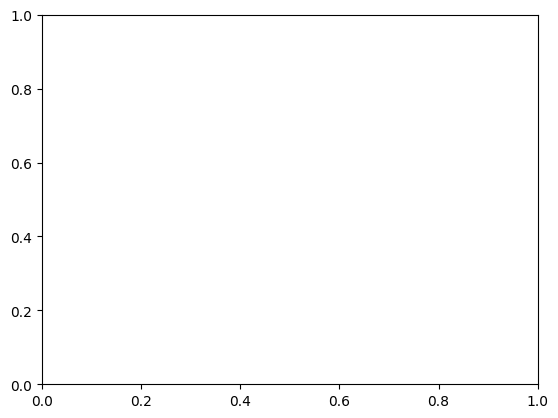

In [10]:
import matplotlib.pyplot as plt
plt.contourf(image_data)  # Create a mappable object
plt.colorbar()  # Add a colorbar for the mappable object
plt.show()

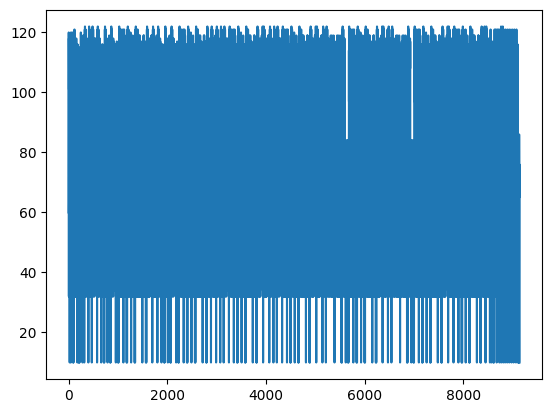

In [11]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(image_data)
plt.show()

In [12]:
import matplotlib.pyplot as plt
from astropy.io import fits

# Open the FITS file
fits_image_filename = 'LRD_Mar.fits'
hdul = fits.open(fits_image_filename)

# Inspect the FITS file structure
hdul.info()

# Access the correct HDU
image_data = hdul[0].data  # Replace 0 with the correct HDU index if needed

# Check the shape of the data
print(image_data.shape)

# If the data is 1D, reshape it (replace (x, y) with actual dimensions)
if len(image_data.shape) == 1:
    image_data = image_data.reshape((100, 100))  # Example dimensions

# Plot the contour
plt.contourf(image_data)
plt.colorbar()
plt.show()

# Close the FITS file
hdul.close()

Filename: LRD_Mar.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (9137,)   uint8   
  1  Joined        1 BinTableHDU     37   3341R x 11C   [K, D, D, D, D, D, D, D, D, D, D]   
(9137,)


ValueError: cannot reshape array of size 9137 into shape (100,100)

(9137,)
Original size: 9137


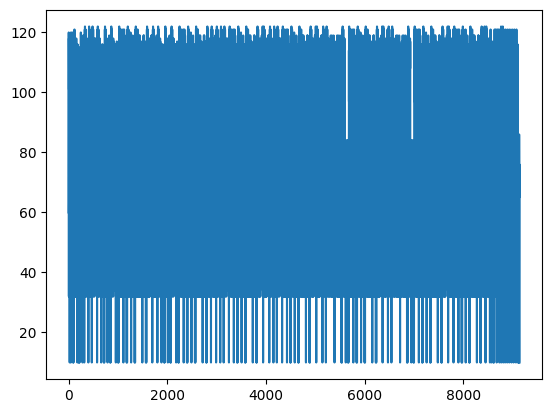

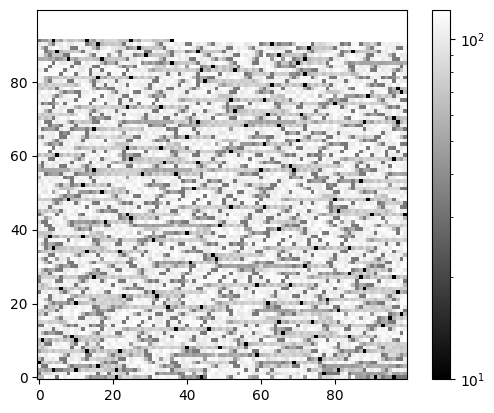

In [13]:

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.io import fits
import numpy as np

# Open the FITS file
fits_image_filename = 'LRD_Mar.fits'
hdul = fits.open(fits_image_filename)

# Access the image data
image_data = hdul[0].data  # Replace 0 with the correct HDU index if needed
print(image_data.shape)

# Check if the data is 1D
if len(image_data.shape) == 1:
    print(f"Original size: {image_data.size}")
    
    # Option 1: Plot as 1D data
    plt.plot(image_data)
    plt.show()
    
    # Option 2: Pad the data to reshape into (100, 100)
    padded_data = np.zeros(100 * 100)
    padded_data[:image_data.size] = image_data
    image_data = padded_data.reshape((100, 100))
    
    # Plot the padded data
    plt.imshow(image_data, origin='lower', cmap='gray', norm=LogNorm())
    plt.colorbar()
    plt.show()

# Close the FITS file
hdul.close()

In [14]:
from astropy.io import fits

# Replace 'galaxies.fits' with your file path
with fits.open('LRD_Mar.fits') as hdulist:
    # Check HDU structure (optional step)
    hdulist.info()
    
    # Access the data table (adjust HDU index as needed)
    data = hdulist[1].data
    
    # Extract columns
    ra = data['RA']
    dec = data['DEC']
    galaxy_ids = data['ID']

# Use the extracted data (example: print first 5 entries)
#print("First 5 Galaxies:")
#for i in range(5):
#    print(f"ID: {galaxy_ids[i]}, RA: {ra[i]}, DEC: {dec[i]}")


Filename: LRD_Mar.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (9137,)   uint8   
  1  Joined        1 BinTableHDU     37   3341R x 11C   [K, D, D, D, D, D, D, D, D, D, D]   


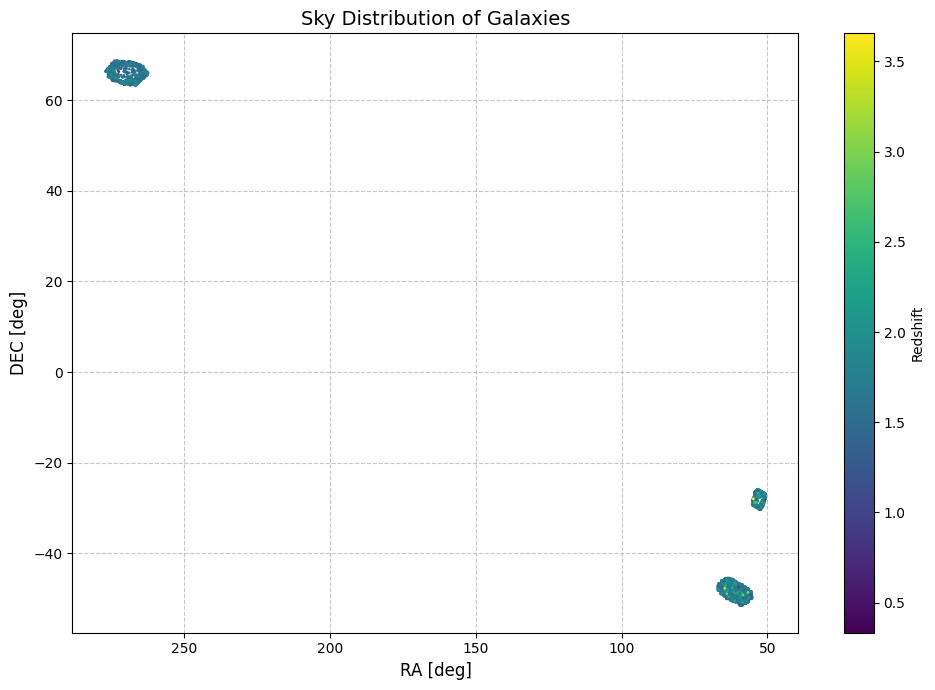

In [15]:
import matplotlib.pyplot as plt
from astropy.io import fits

# Load data
with fits.open('LRD_Mar.fits') as hdulist:
    data = hdulist[1].data
    ra = data['RA']
    dec = data['DEC']

redshift = data['Z']  # Replace 'Z' with your redshift column

# Create plot
plt.figure(figsize=(10, 7))
plt.scatter(ra, dec, c=redshift, s=1, cmap='viridis')
plt.xlabel('RA [deg]', fontsize=12)
plt.ylabel('DEC [deg]', fontsize=12)
plt.title('Sky Distribution of Galaxies', fontsize=14)
plt.gca().invert_xaxis()
plt.grid(ls='--', alpha=0.7)
plt.tight_layout()
plt.colorbar(label='Redshift')
plt.savefig('galaxy_positions.png', dpi=300)  # Save as image
plt.show()

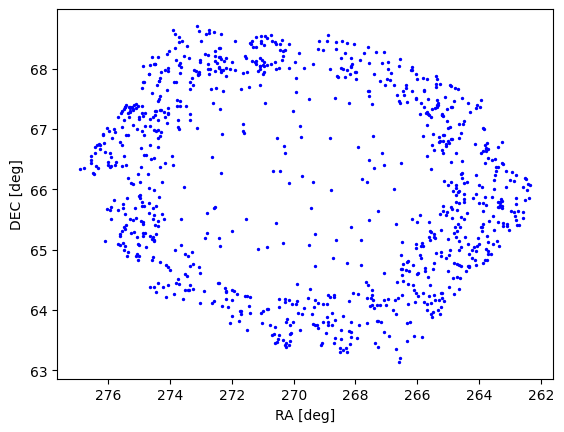

Number of galaxies in the subset: 971


In [16]:
from astropy.io import fits
import matplotlib.pyplot as plt

# Load data
with fits.open('LRD_Mar.fits') as hdulist:
    data = hdulist[1].data

# Filter galaxies with DEC > 60 and RA > 250
mask = (data['DEC'] > 60) & (data['RA'] > 250)
subset = data[mask]

# Plot the subset
plt.scatter(subset['RA'], subset['DEC'], s=2, c='blue')
plt.xlabel('RA [deg]'), plt.ylabel('DEC [deg]')
plt.gca().invert_xaxis()
plt.show()

# Save subset (optional)
fits.BinTableHDU(subset).writeto('group_subset.fits', overwrite=True)

#Print the number of galaxies in the subset
print(f"Number of galaxies in the subset: {len(subset)}")

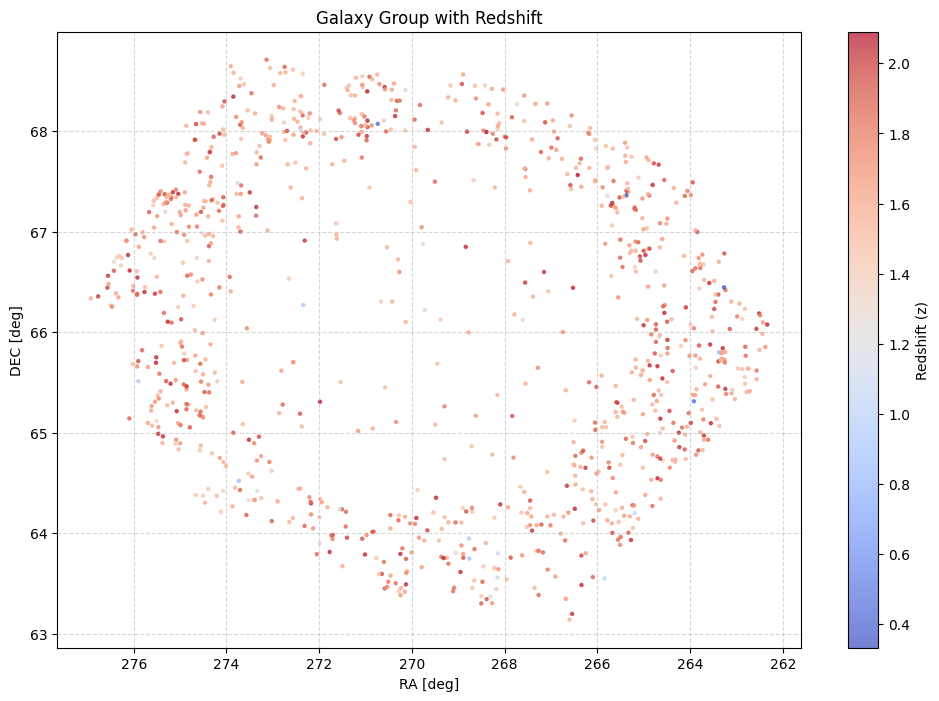

In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt

# Load data
with fits.open('LRD_Mar.fits') as hdulist:
    data = hdulist[1].data

# Filter galaxies with DEC > 60 and RA > 250
mask = (data['DEC'] > 60) & (data['RA'] > 250)
subset = data[mask]

# Plot RA vs. DEC with redshift color-coding
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    subset['RA'],
    subset['DEC'],
    c=subset['Z'],  # Replace 'Z' with your redshift column
    s=5, 
    alpha=0.7,
    #cmap='viridis' # Choose a colormap
    #cmap='plasma'  # Optional: use a different colormap
    cmap='coolwarm'  # Optional: use a different colormap
)
plt.colorbar(scatter, label='Redshift (z)')
plt.xlabel('RA [deg]'), plt.ylabel('DEC [deg]')
plt.gca().invert_xaxis()
plt.grid(ls='--', alpha=0.5)
plt.title('Galaxy Group with Redshift')
plt.show()

# Save subset (optional)
fits.BinTableHDU(subset).writeto('group_with_redshift.fits', overwrite=True)

In [3]:
import numpy as np

# Load your galaxy subset (RA, DEC)
# Example:
ra_data = subset['RA']
dec_data = subset['DEC']

# Define the number of random points (typically 10–50x data size)
n_rand = 10 * len(ra_data)

# Generate random RA and DEC within the same bounds as your data
ra_min, ra_max = np.min(ra_data), np.max(ra_data)
dec_min, dec_max = np.min(dec_data), np.max(dec_data)

ra_rand = np.random.uniform(ra_min, ra_max, n_rand)
dec_rand = np.random.uniform(dec_min, dec_max, n_rand)

In [ ]:
from Corrfunc.mocks.DDtheta_mocks import DDtheta_mocks

# Define angular bins (in degrees)
theta_bins = np.logspace(-2, 1, 15)  # 0.01° to 10°, logarithmic spacing

# Convert RA/DEC to radians (required by Corrfunc)
ra_data_rad = np.radians(ra_data)
dec_data_rad = np.radians(dec_data)
ra_rand_rad = np.radians(ra_rand)
dec_rand_rad = np.radians(dec_rand)

# Calculate DD (data-data pairs)
DD = DDtheta_mocks(autocorr=1, nthreads=4,
                   theta_bins=theta_bins,
                   RA1=ra_data_rad, DEC1=dec_data_rad,
                   RA2=ra_data_rad, DEC2=dec_data_rad)

# Calculate DR (data-random pairs)
DR = DDtheta_mocks(autocorr=0, nthreads=4,
                   theta_bins=theta_bins,
                   RA1=ra_data_rad, DEC1=dec_data_rad,
                   RA2=ra_rand_rad, DEC2=dec_rand_rad)

# Calculate RR (random-random pairs)
RR = DDtheta_mocks(autocorr=1, nthreads=4,
                   theta_bins=theta_bins,
                   RA1=ra_rand_rad, DEC1=dec_rand_rad,
                   RA2=ra_rand_rad, DEC2=dec_rand_rad)

ModuleNotFoundError: No module named 'Corrfunc.theory.DDtheta_mocks'

In [9]:
!which python

/home/k3vinpaul/miniconda3/bin/python
